In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.style.use("default")


In [ ]:
df = pd.read_csv(
    "ecommerce_customer_behavior_dataset_v2.csv",
    parse_dates=["Date"]
)

df.columns = df.columns.str.lower()
df.head()


,order_id,customer_id,date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration_minutes,pages_viewed,is_returning_customer,delivery_time_days,customer_rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [ ]:
df.isna().sum()
df.duplicated().sum()
df['order_id'].duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes


,0
order_id,object
customer_id,object
date,datetime64[ns]
age,int64
gender,object
city,object
product_category,object
unit_price,float64
quantity,int64
discount_amount,float64


In [ ]:
df[df['total_amount'] <= 0]
df[df['age'] < 18]
df[df['quantity'] <= 0]
df[df['customer_rating'] > 5]


,order_id,customer_id,date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration_minutes,pages_viewed,is_returning_customer,delivery_time_days,customer_rating


In [ ]:
df.describe()



,date,age,unit_price,quantity,discount_amount,total_amount,session_duration_minutes,pages_viewed,delivery_time_days,customer_rating
count,17049,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000
mean,2023-08-15 01:33:09.723737344,34.945745,447.901689,3.011379,69.788135,1277.438711,14.535633,9.003109,6.503607,3.899408
min,2023-01-01 00:00:00,18.000000,5.050000,1.000000,0.000000,6.210000,4.000000,1.000000,1.000000,1.000000
25%,2023-04-26 00:00:00,26.000000,73.260000,2.000000,0.000000,172.970000,13.000000,7.000000,4.000000,3.000000
50%,2023-08-16 00:00:00,35.000000,174.680000,3.000000,0.000000,455.850000,15.000000,9.000000,6.000000,4.000000
75%,2023-12-06 00:00:00,42.000000,494.570000,4.000000,32.710000,1267.750000,17.000000,11.000000,8.000000,5.000000
max,2024-03-25 00:00:00,75.000000,7900.010000,5.000000,6538.290000,37852.050000,26.000000,18.000000,25.000000,5.000000
std,NaN,11.046855,722.319705,1.417027,240.704662,2358.436375,2.925524,2.259954,3.488787,1.128803


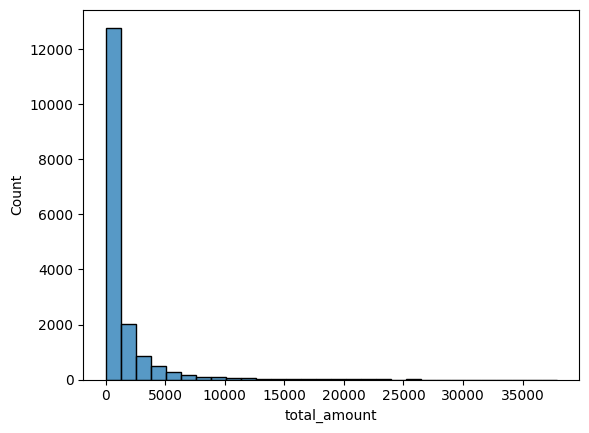

In [ ]:
sns.histplot(df['total_amount'], bins=30)
plt.show()


In [ ]:
df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)


,total_amount
product_category,
Electronics,10481897.65
Home & Garden,4023903.94
Sports,3205086.99
Fashion,1577035.70
Toys,1014237.53
Beauty,694437.02
Food,422054.65
Books,360399.11


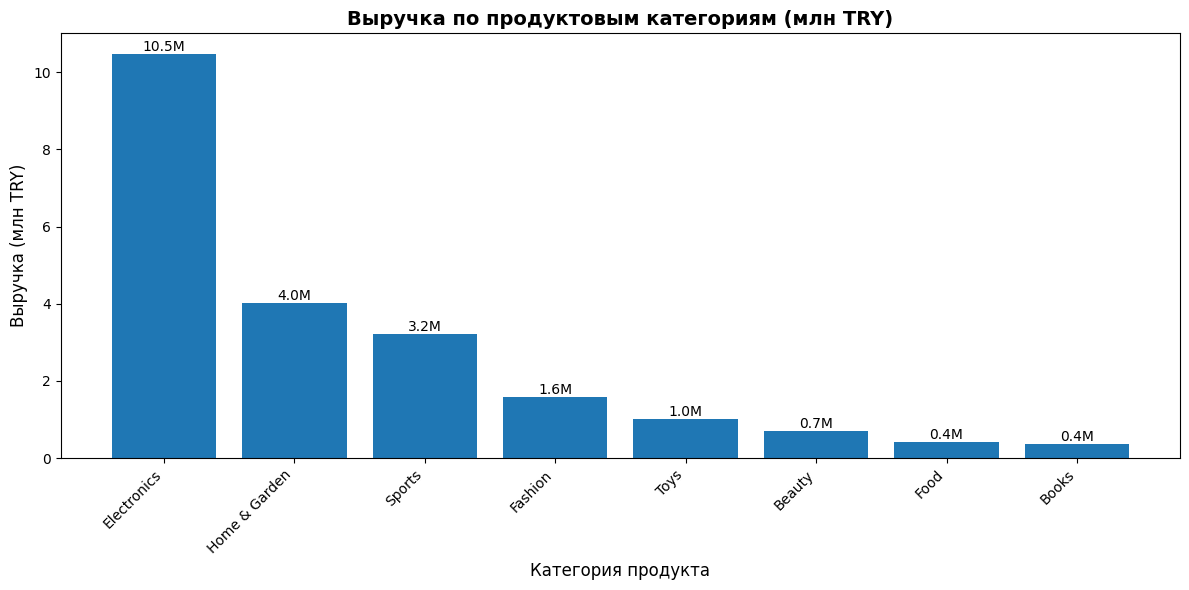

In [ ]:
category_revenue = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(category_revenue.index, category_revenue.values / 1000000)  # в миллионах
plt.title('Выручка по продуктовым категориям (млн TRY)', fontsize=14, fontweight='bold')
plt.xlabel('Категория продукта', fontsize=12)
plt.ylabel('Выручка (млн TRY)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавьте значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

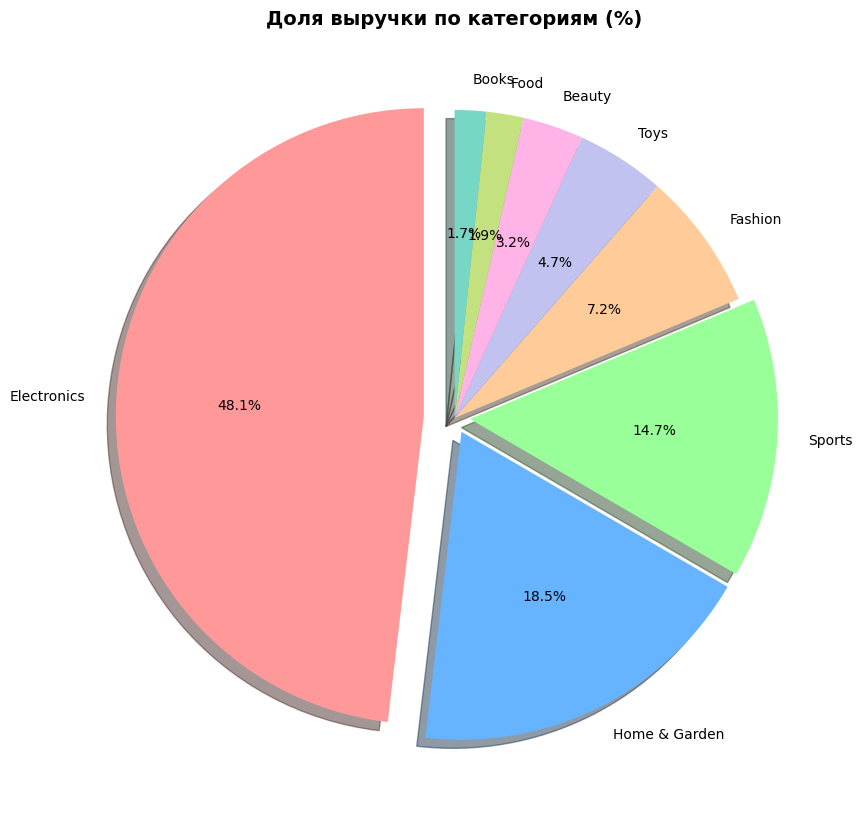

In [ ]:
plt.figure(figsize=(10, 10))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76d7c4']
explode = (0.1, 0.05, 0.05, 0, 0, 0, 0, 0)  # Выделяем топ-3 категории

plt.pie(category_revenue.values,
        labels=category_revenue.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True)

plt.title('Доля выручки по категориям (%)', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
snapshot_date = df['date'].max() + pd.Timedelta(days=1)

rfm = (
    df.groupby('customer_id')
    .agg({
        'date': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'total_amount': 'sum'
    })
    .reset_index()
)

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']


In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(
    rfm[['recency', 'frequency', 'monetary']]
)


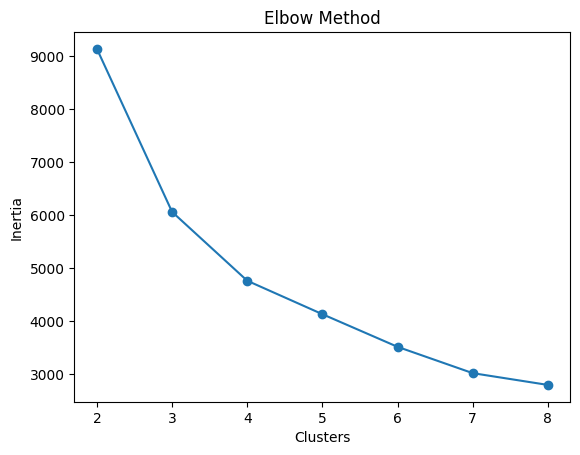

In [ ]:
inertia = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
})


,recency,frequency,monetary,customer_id
cluster,,,,
0,68.683140,6.151163,19120.793837,344
1,84.545378,2.533613,2507.670252,2380
2,58.014559,6.165605,6259.392348,1099
3,288.852167,1.807137,2000.146236,1177


In [ ]:
segment_map = {
    0: "VIP-клиенты",
    1: "Массовый сегмент",
    2: "Лояльные покупатели",
    3: "Спящие (Отток)"
}

rfm['segment'] = rfm['cluster'].map(segment_map)


In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)

rfm['pca1'] = components[:, 0]
rfm['pca2'] = components[:, 1]


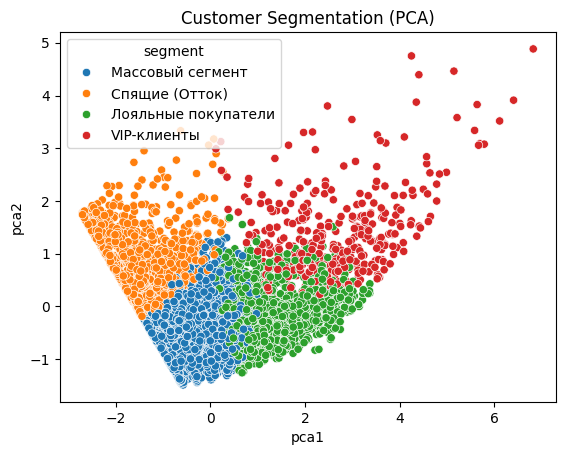

In [ ]:
sns.scatterplot(
    data=rfm,
    x='pca1',
    y='pca2',
    hue='segment'
)
plt.title("Customer Segmentation (PCA)")
plt.show()


In [ ]:
df_final = df.merge(
    rfm[['customer_id', 'segment']],
    on='customer_id',
    how='left'
)


In [ ]:
df_final.to_csv(
    "ecommerce_with_segments.csv",
    index=False,
    encoding='utf-8-sig'
)
